In [1]:
import torch
import torchvision.transforms as transforms              
from torchvision.datasets import ImageFolder
import torchvision.models as models
from torchvision.models import VGG16_BN_Weights
from torch.utils.data import DataLoader
import numpy as np
from torch.utils.data import Subset
from src.temperature_scaling import ModelWithTemperature
from src.imagenet_real import aps_imagenet_real_hist, raps_imagenet_real_hist, saps_imagenet_real_hist, aps_imagenet_real_scatter,raps_imagenet_real_scatter, saps_imagenet_real_scatter

# load pre-trained model
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = models.vgg16_bn(weights=VGG16_BN_Weights.IMAGENET1K_V1).to(device)

#  Reprocess
data_transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224), 
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]) 
])

sorted_val_path = "D:\\Download\\ImageNet-1K\\Validation_Set\\sorted_ImageNet_val"
dataset = ImageFolder(root=sorted_val_path, transform=data_transform)

# Temperature Scaling
subset_size = len(dataset) // 10
indices = np.random.choice(len(dataset), subset_size, replace=False)
subset_dataset = Subset(dataset, indices)
train_loader = DataLoader(subset_dataset, batch_size=32, shuffle=False, num_workers=4)

model = ModelWithTemperature(model, temperature = 1.0).to(device)
model.set_temperature(train_loader)
model.eval()

# The number of times the experiment is going to be repeated
num_runs = 10

# error rate
alpha = 0.2

Before temperature - NLL: 1.247, ECE: 0.031
Optimal temperature: 1.028
After temperature - NLL: 1.244, ECE: 0.031


APS Classification on ImageNet Real (alpha=0.2), Start!

Running experiment 1/10...
Running experiment 2/10...
Running experiment 3/10...
Running experiment 4/10...
Running experiment 5/10...
Running experiment 6/10...
Running experiment 7/10...
Running experiment 8/10...
Running experiment 9/10...
Running experiment 10/10...
Final Average q_hat: 0.8064 ± 0.0016
Final Average Prediction Set Size: 5.53 ± 0.08
Final Average Coverage: 0.8004 ± 0.0040
Final Average Real Probability: 0.6871 ± 0.0038


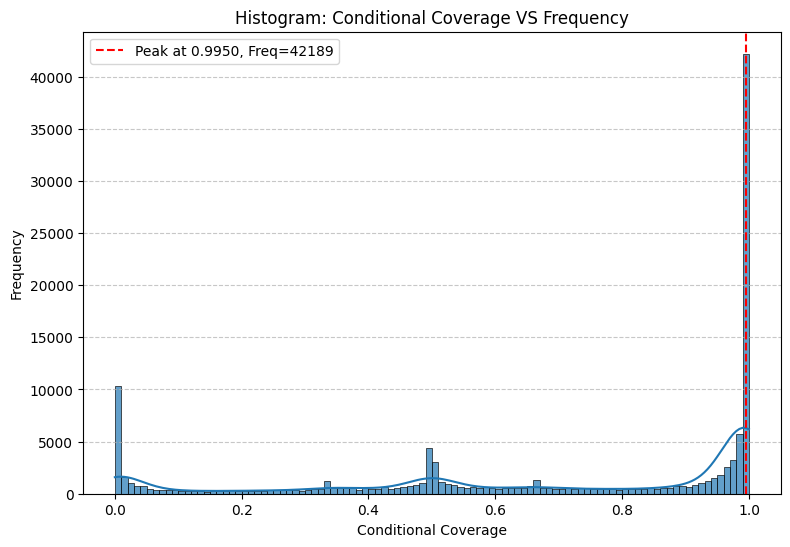

42189 (33.92%) samples reached the peak conditional coverage at 0.9950


In [2]:
aps_imagenet_real_hist(model, dataset, device, num_runs, alpha, is_ground_truth=False)

RAPS Classification on ImageNet Real (alpha=0.2), Start!

Running experiment 1/10...
Running experiment 2/10...
Running experiment 3/10...
Running experiment 4/10...
Running experiment 5/10...
Running experiment 6/10...
Running experiment 7/10...
Running experiment 8/10...
Running experiment 9/10...
Running experiment 10/10...
Final Average q_hat: 0.8224 ± 0.0016
Final Average Prediction Set Size: 2.87 ± 0.01
Final Average Coverage: 0.7995 ± 0.0037
Final Average Real Probability: 0.6679 ± 0.0035


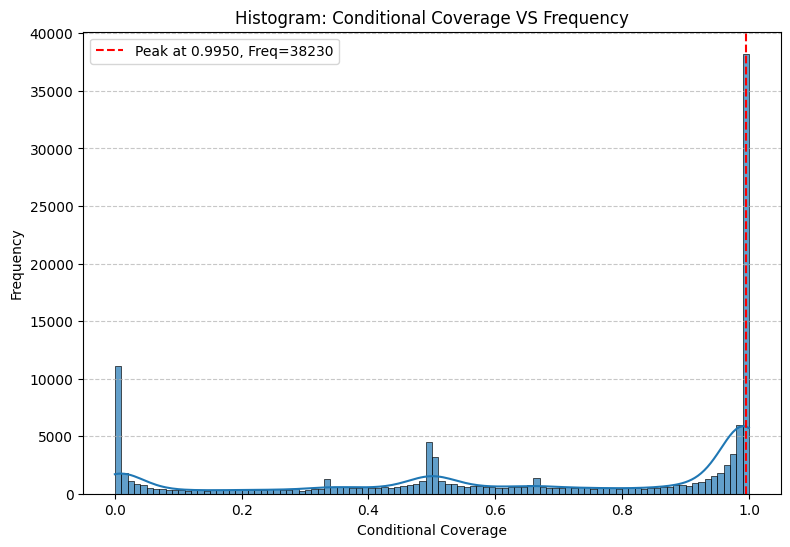

38230 (30.74%) samples reached the peak conditional coverage at 0.9950


In [3]:
raps_imagenet_real_hist(model, dataset, device, lambda_=0.03, k_reg=7, num_runs=10, alpha=0.2, is_ground_truth=False)

SAPS Classification on ImageNet Real (alpha=0.2), Start!

Running experiment 1/10...
Running experiment 2/10...
Running experiment 3/10...
Running experiment 4/10...
Running experiment 5/10...
Running experiment 6/10...
Running experiment 7/10...
Running experiment 8/10...
Running experiment 9/10...
Running experiment 10/10...
Final Average q_hat: 0.8070 ± 0.0027
Final Average Prediction Set Size: 2.44 ± 0.02
Final Average Coverage: 0.7997 ± 0.0036
Final Average Real Probability: 0.6838 ± 0.0022


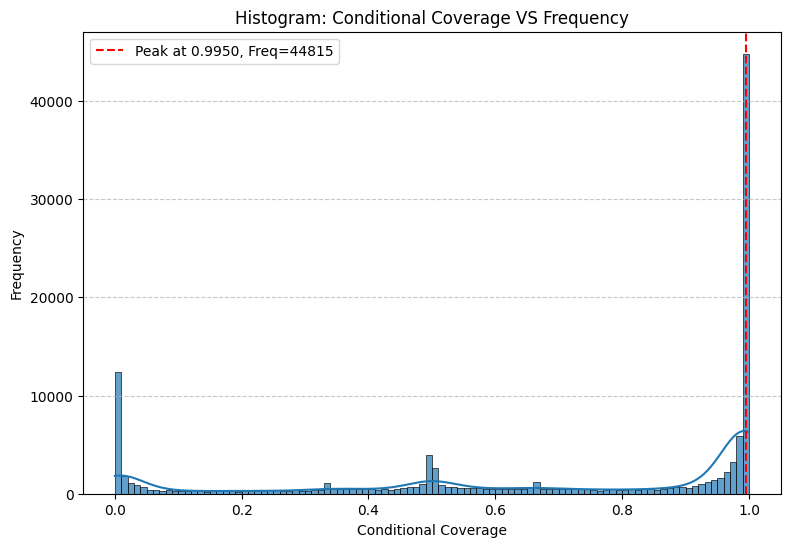

44815 (36.04%) samples reached the peak conditional coverage at 0.9950


In [4]:
saps_imagenet_real_hist(model, dataset, device, lambda_=0.1, num_runs=10, alpha=0.2, is_ground_truth=False)

APS Classification on ImageNet Real (alpha=0.2), Start!

Running experiment 1/10...
Running experiment 2/10...
Running experiment 3/10...
Running experiment 4/10...
Running experiment 5/10...
Running experiment 6/10...
Running experiment 7/10...
Running experiment 8/10...
Running experiment 9/10...
Running experiment 10/10...
Final Average q_hat: 0.8064 ± 0.0016
Final Average Prediction Set Size: 5.53 ± 0.08
Final Average Coverage: 0.8004 ± 0.0040
Final Average Real Probability: 0.6871 ± 0.0038


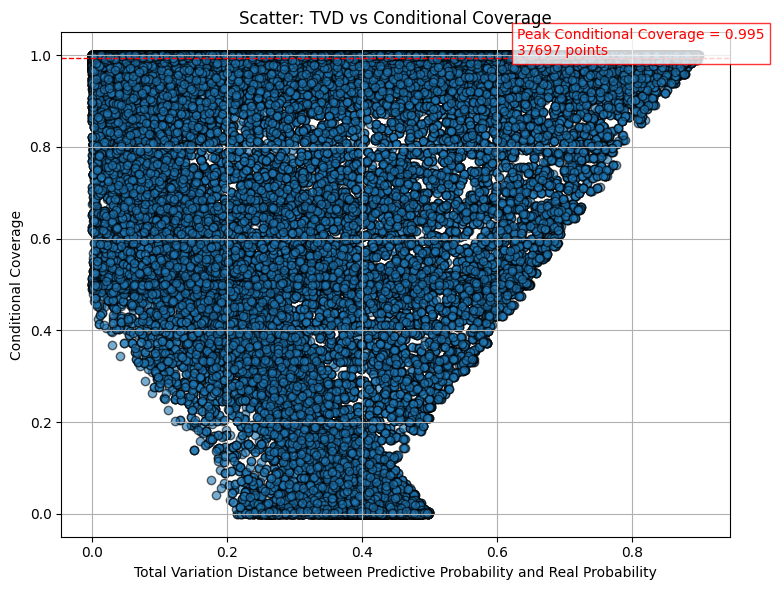

Peak Conditional Coverage = 0.995, with 37697 samples

=== Count Regions Summary ===
37098 (29.8%) samples in Count Region 1 [x:0-0.5, y:0.8-1.0]
25378 (20.4%) samples in Count Region 2 [x:0.5-1.0, y:0.8-1.0]
50042 (40.2%) samples in Count Region 3 [x:0-0.5, y:0-0.8]

=== Sample Points in Specific Regions ===

--- Region 1: low TVD, high Coverage ---
Sample 1:
  Predictive Probability Set: ['0.97420']
  Real Probability Set      : ['0.99413']
Sample 2:
  Predictive Probability Set: ['0.99626']
  Real Probability Set      : ['0.99615']
Sample 3:
  Predictive Probability Set: ['0.92042']
  Real Probability Set      : ['0.99077']

--- Region 2: high TVD, low Coverage ---
Sample 1:
  Predictive Probability Set: ['0.99111']
  Real Probability Set      : ['0.01741']
Sample 2:
  Predictive Probability Set: ['0.80099']
  Real Probability Set      : ['0.00130']
Sample 3:
  Predictive Probability Set: ['0.25957', '0.16920', '0.08547', '0.08268', '0.04939', '0.03232', '0.02351', '0.01624', '0.015

In [5]:
aps_imagenet_real_scatter(model, dataset, device, num_runs, alpha)

RAPS Classification on ImageNet Real (alpha=0.2), Start!

Running experiment 1/10...
Running experiment 2/10...
Running experiment 3/10...
Running experiment 4/10...
Running experiment 5/10...
Running experiment 6/10...
Running experiment 7/10...
Running experiment 8/10...
Running experiment 9/10...
Running experiment 10/10...
Final Average q_hat: 0.8224 ± 0.0016
Final Average Prediction Set Size: 2.87 ± 0.01
Final Average Coverage: 0.7995 ± 0.0037
Final Average Real Probability: 0.6679 ± 0.0035


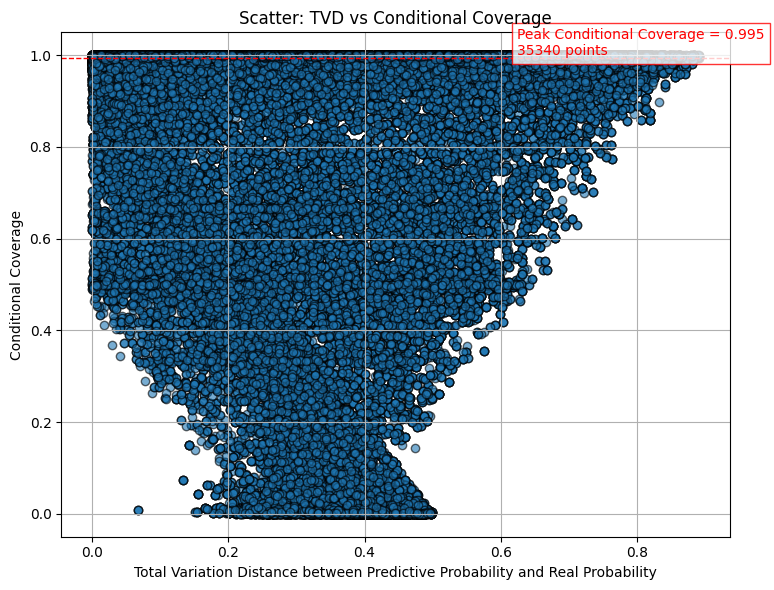

Peak Conditional Coverage = 0.995, with 35340 samples

=== Count Regions Summary ===
38726 (31.1%) samples in Count Region 1 [x:0-0.5, y:0.8-1.0]
22073 (17.7%) samples in Count Region 2 [x:0.5-1.0, y:0.8-1.0]
54516 (43.8%) samples in Count Region 3 [x:0-0.5, y:0-0.8]

=== Sample Points in Specific Regions ===

--- Region 1: low TVD, high Coverage ---
Sample 1:
  Predictive Probability Set: ['0.98026']
  Real Probability Set      : ['0.99282']
Sample 2:
  Predictive Probability Set: ['0.93457']
  Real Probability Set      : ['0.99593']
Sample 3:
  Predictive Probability Set: ['0.81221']
  Real Probability Set      : ['0.99738']

--- Region 2: high TVD, low Coverage ---
Sample 1:
  Predictive Probability Set: ['0.43520', '0.12814', '0.10649', '0.09382', '0.01819', '0.01575', '0.01303']
  Real Probability Set      : ['0.00081', '0.00077', '0.00077', '0.00000', '0.00000', '0.00000', '0.00124']
Sample 2:
  Predictive Probability Set: ['0.42675', '0.27454', '0.04877', '0.03964', '0.03160']
 

In [6]:
raps_imagenet_real_scatter(model, dataset, device, lambda_=0.03, k_reg=7, num_runs=10, alpha=0.2)

SAPS Classification on CIFAR10-H(alpha=0.2), Start!

Running experiment 1/10...
Running experiment 2/10...
Running experiment 3/10...
Running experiment 4/10...
Running experiment 5/10...
Running experiment 6/10...
Running experiment 7/10...
Running experiment 8/10...
Running experiment 9/10...
Running experiment 10/10...
Final Average q_hat: 0.8070 ± 0.0027
Final Average Prediction Set Size: 2.44 ± 0.02
Final Average Coverage: 0.7997 ± 0.0036
Final Average Real Probability: 0.6838 ± 0.0022


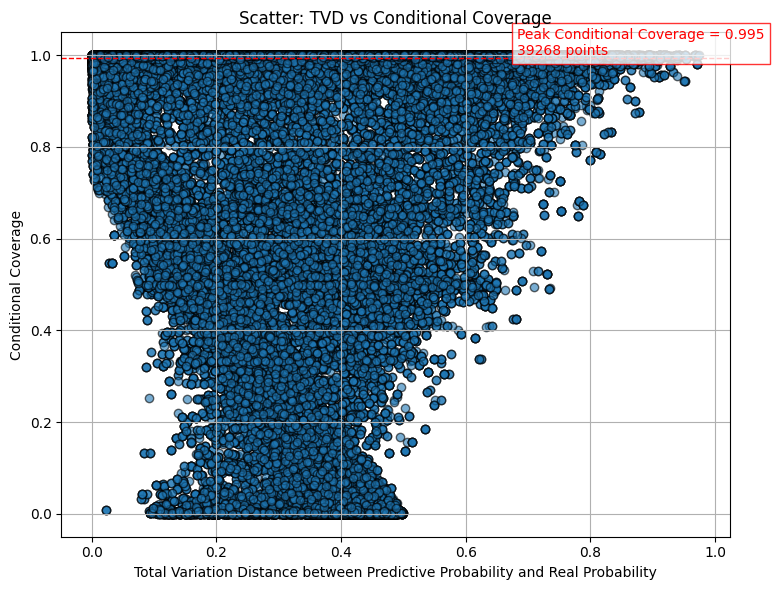

Peak Conditional Coverage = 0.995, with 39268 samples

=== Count Regions Summary ===
41392 (33.3%) samples in Count Region 1 [x:0-0.5, y:0.8-1.0]
21922 (17.6%) samples in Count Region 2 [x:0.5-1.0, y:0.8-1.0]
50603 (40.7%) samples in Count Region 3 [x:0-0.5, y:0-0.8]

=== Sample Points in Specific Regions ===

--- Region 1: low TVD, high Coverage ---
Sample 1:
  Predictive Probability Set: ['0.92757']
  Real Probability Set      : ['0.98914']
Sample 2:
  Predictive Probability Set: ['0.80263']
  Real Probability Set      : ['0.80558']
Sample 3:
  Predictive Probability Set: ['0.81108']
  Real Probability Set      : ['0.98421']

--- Region 2: high TVD, low Coverage ---
Sample 1:
  Predictive Probability Set: ['0.27955', '0.09408', '0.04398', '0.04216', '0.02813', '0.02548']
  Real Probability Set      : ['0.00056', '0.00056', '0.00000', '0.00056', '0.00039', '0.00039']
Sample 2:
  Predictive Probability Set: ['0.36976', '0.08273', '0.06660', '0.05185', '0.04020', '0.04011']
  Real Proba

In [7]:
saps_imagenet_real_scatter(model, dataset, device, lambda_=0.1, num_runs=10, alpha=0.2)